In [9]:
from mxnet import np, npx
from mxnet import autograd
from mxnet.gluon import Trainer
from mxnet.gluon import nn
from mxnet.gluon.loss import L2Loss, HuberLoss
from mxnet.gluon.data import ArrayDataset, DataLoader
from mxnet import init
from d2l import mxnet as d2l
import seaborn as sns
from sklearn.preprocessing import StandardScaler
npx.set_np()

In [2]:
w = np.array([4, 200])
nobs = 1000
A = np.ones((nobs, 2))
A[:, 0] = np.random.normal(100, 20, nobs)
y = np.dot(A, w) + np.random.normal(scale=0.01, size=nobs)

In [3]:
true_w = np.array([4])
true_b = 200
features, y = d2l.synthetic_data(true_w, true_b, nobs)
A = np.ones((nobs, 3))
A[:, 0] = features.squeeze()

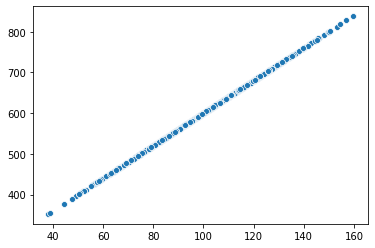

In [348]:
sns.scatterplot(x=A[:, 0].squeeze().tolist(), y=y.tolist())

## Define Data iterator

In [4]:
def dataiter(data, batch_size=100, is_train=False):
    ds = ArrayDataset(*data)
    return DataLoader(ds, batch_size=batch_size, shuffle=is_train)

In [5]:
def normalize(X):
    mean = X.mean(axis=0)
    sd = X.std(axis=0)
    return (X - mean)/sd, mean, sd

In [6]:
batch_size = 100
features = A[:, 0, None]
features, mean, sd = normalize(features)
data = dataiter((features, y), batch_size=batch_size)

## Define Architecture

In [13]:
net = nn.Sequential()
net.add(nn.Dense(1, use_bias=True))

### Initialize Params

In [14]:
net.initialize(init.Normal(sigma=0.01))

## Define Loss

In [15]:
loss_fn = L2Loss()

## Define Optimization loop

In [16]:
num_epochs = 5
train = Trainer(net.collect_params(), 'sgd', optimizer_params={'learning_rate': 1})
for epoch in range(num_epochs):
    for X, y_true in data:
        with autograd.record():
            y_hat = net(X)
            loss = loss_fn(y_true, y_hat)
        loss.backward()
        train.step(batch_size)
    print(f'Epoch: {epoch + 1}, Loss: {loss.mean()}')

Epoch: 1, Loss: 4.577266e-05
Epoch: 2, Loss: 4.5772686e-05
Epoch: 3, Loss: 4.5772686e-05
Epoch: 4, Loss: 4.5772686e-05
Epoch: 5, Loss: 4.5772686e-05


In [17]:
net[0].weight.data()/sd

array([[4.000939]])

In [18]:
net[0].bias.data() - net[0].weight.data()*mean/sd

array([[199.99933]])